<a href="https://colab.research.google.com/github/nebulousman/NLP-training-dataset/blob/master/balanced_sample_allreviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sample of allreviews.csv**

This code was created for CrowdDoing and the efforts to apply NLP tecniques to classify product reviews by consumers.
allrevies.csv contains 1,538,799 amazon reviews of medicinal products majority of which are positive (71% fifestars 12% 4stars & rest 1-3). The goal is to create a balanced sample for purposes of modeling and human labeling without introducing bias.

In [ ]:
#imports
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#connect to google drive for dataset
# mount google drive for access to dataset previously added to the drive
from google.colab import drive
drive.mount('/content/drive')
#if you need to remount drive
#drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# read dataset into dataframe - change path if needed
df = pd.read_csv('/content/drive/My Drive/Analysis/allreviews.csv')

In [ ]:
#create id for each review that maps to original index of allreviews dataframe
#this is a precaution as analysis and manipulation should not re-index but in case
#dataframe is somehow re-indexed original index is preserved by this ID column
df['ID_allreviews_index'] = df.index

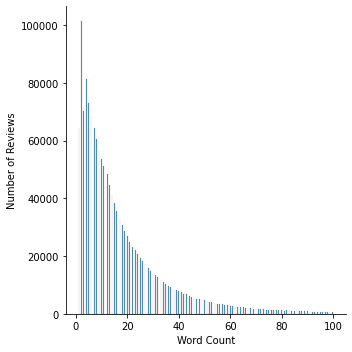

In [ ]:
#cleanup

#drop blank reviews - not sure but na & null seem to be the same in python
#note ProcessedText was created by others - believe it is ReviewContent lowercase, punctuation & stopwords removed &
#lemmatized or maybe stemmed (hope it was lemmatization)
#df = df[df["ProcessedText"].notna()]
df = df[df['ProcessedText'].notnull()]
df = df[df['ReviewContent'].notnull()] #for some reason there are 93 notnull processed reviews where review content is null
#drop dupes
df = df.drop_duplicates()

#count tokens and save value in new column
f=lambda x: len(x['ProcessedText'].split(' '))
df['wordcount']=df.apply(lambda x: len(x['ProcessedText'].split(' ')), axis=1)

#remove reviews with more than 100 words - avg paragraph is less than 100 & most of our reviews are under 100
#our dataframe does have a small number reviews in excess of 1K which would be computationaly expensive and would add little to the analysis
df = df.loc[df['wordcount'] <= 100]

#view distribution of wordcount column
fig=sns.displot(df['wordcount'])
plt.xlabel("Word Count")
plt.ylabel("Number of Reviews")
plt.show(fig)

In [ ]:
#create groupings by review star in new column - original data has 71% fifestars 12% 4stars & rest 1-3
#purpose is to create groupings to create a balanced sample for labeling and analysis
#df['ReviewStar'].plot(kind='hist')
df['ReviewStarGroup']=df['ReviewStar']
df.ReviewStarGroup[(df.ReviewStarGroup==1) | (df.ReviewStarGroup==2) | (df.ReviewStarGroup==3)] = '1-3'
df.ReviewStarGroup[(df.ReviewStarGroup==4) | (df.ReviewStarGroup==5)] = '4-5'
#check distribution by group
df['ReviewStarGroup'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


4-5    1248393
1-3     265528
Name: ReviewStarGroup, dtype: int64

In [ ]:
#sample entire minority class plus equal number randomly picked from majority class
group = df.groupby('ReviewStarGroup')
df = group.apply(lambda x: x.sample(group.size().min()))

In [ ]:
#save results to file - to be used for future labeling by volunteers
#goal is to have a balanced sample without bias
df.to_csv('/content/drive/My Drive/Analysis/CrowdDoingAmazonReviews.csv')

In [ ]:
df['ReviewStarGroup'].value_counts()

1-3    265528
4-5    265528
Name: ReviewStarGroup, dtype: int64